In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('chess.csv')
data.head()

,game_id,rated,start_time,end_time,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1504210000000,1504210000000,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1504130000000,1504130000000,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1504130000000,1504130000000,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1504110000000,1504110000000,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1504030000000,1504030000000,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   game_id         20058 non-null  object
 1   rated           20058 non-null  bool  
 2   start_time      20058 non-null  int64 
 3   end_time        20058 non-null  int64 
 4   turns           20058 non-null  int64 
 5   victory_status  20058 non-null  object
 6   winner          20058 non-null  object
 7   time_increment  20058 non-null  object
 8   white_id        20058 non-null  object
 9   white_rating    20058 non-null  int64 
 10  black_id        20058 non-null  object
 11  black_rating    20058 non-null  int64 
 12  moves           20058 non-null  object
 13  opening_eco     20058 non-null  object
 14  opening_name    20058 non-null  object
 15  opening_ply     20058 non-null  int64 
dtypes: bool(1), int64(6), object(9)
memory usage: 2.3+ MB


Opening_ECO: ECO stands for Encyclopedia of Chess Openings. It is a standardized code for any given chess opening. The chess openings are categorised into five broad areas ("A" through "E"), with each of those broken up into one hundred subcategories ("00" through "99"). The openings were published in five volumes of ECO, with volumes labeled "A" through "E".

In [4]:
#check the columnc in the data
data.columns

Index(['game_id', 'rated', 'start_time', 'end_time', 'turns', 'victory_status',
       'winner', 'time_increment', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [5]:
#check for missing data
data.isna().sum()

game_id           0
rated             0
start_time        0
end_time          0
turns             0
victory_status    0
winner            0
time_increment    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [6]:
data.set_index('game_id', inplace=True)

In [7]:
#describe the numeric data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
start_time,20058.0,1.483617e+12,2.850151e+10,1.376772e+12,1.477548e+12,1.496010e+12,1.503170e+12,1.504493e+12
end_time,20058.0,1.483618e+12,2.850140e+10,1.376772e+12,1.477548e+12,1.496010e+12,1.503170e+12,1.504494e+12
turns,20058.0,6.046600e+01,3.357058e+01,1.000000e+00,3.700000e+01,5.500000e+01,7.900000e+01,3.490000e+02
white_rating,20058.0,1.596632e+03,2.912534e+02,7.840000e+02,1.398000e+03,1.567000e+03,1.793000e+03,2.700000e+03
black_rating,20058.0,1.588832e+03,2.910361e+02,7.890000e+02,1.391000e+03,1.562000e+03,1.784000e+03,2.723000e+03
opening_ply,20058.0,4.816981e+00,2.797152e+00,1.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00,2.800000e+01


From this decriptive analysis we can see that the mean rating for white player is 1597 while for black players is 1589

Also, from the analysis above we can deduce that the turns column has a lot of outliers by merely looking at the mean, min, 25th, 75th and max data. 
The min no of moves is 1 while the max is 349 which is clearly very far apart. A closer look at the 25% and 75% show that the values are 37 and 79 turns respectively.

In [8]:
#create a duration column which is the subtraction of the start time from the end time
data['game_duration'] = data['end_time'] - data['start_time']

In [9]:
data.head()

,rated,start_time,end_time,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,game_duration
game_id,,,,,,,,,,,,,,,,
TZJHLljE,False,1504210000000,1504210000000,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,0
l1NXvwaE,True,1504130000000,1504130000000,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,0
mIICvQHh,True,1504130000000,1504130000000,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,0
kWKvrqYL,True,1504110000000,1504110000000,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,0
9tXo1AUZ,True,1504030000000,1504030000000,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,0


Key analyses </br>
-distribution of players by rating (black & white) </br>
-distribution of games by outcomes (hist, barshaart) </br>
-player rating (white & black) vs outcome </br>
-does higher rating correlate to winning?</br>
-most common opening</br>
-average turns per opening vs outcome</br>
-time increment vs player rating</br>
-common moves or patterns that lead to specific outcome</br>

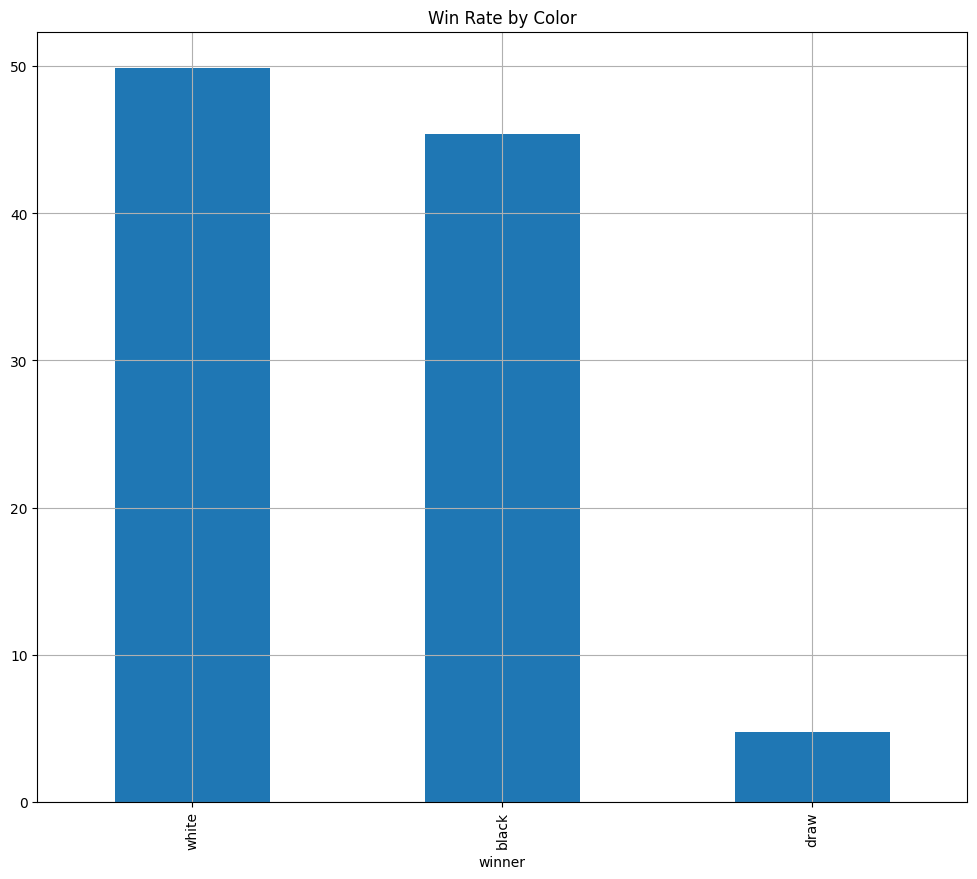

In [10]:
#win rate based on color
winners = data['winner'].value_counts(normalize=True) * 100
winners.plot(kind='bar', figsize=(12, 10))
plt.title("Win Rate by Color")
plt.grid(True)

In [11]:
print(winners)

winner
white    49.860405
black    45.403330
draw      4.736265
Name: proportion, dtype: float64


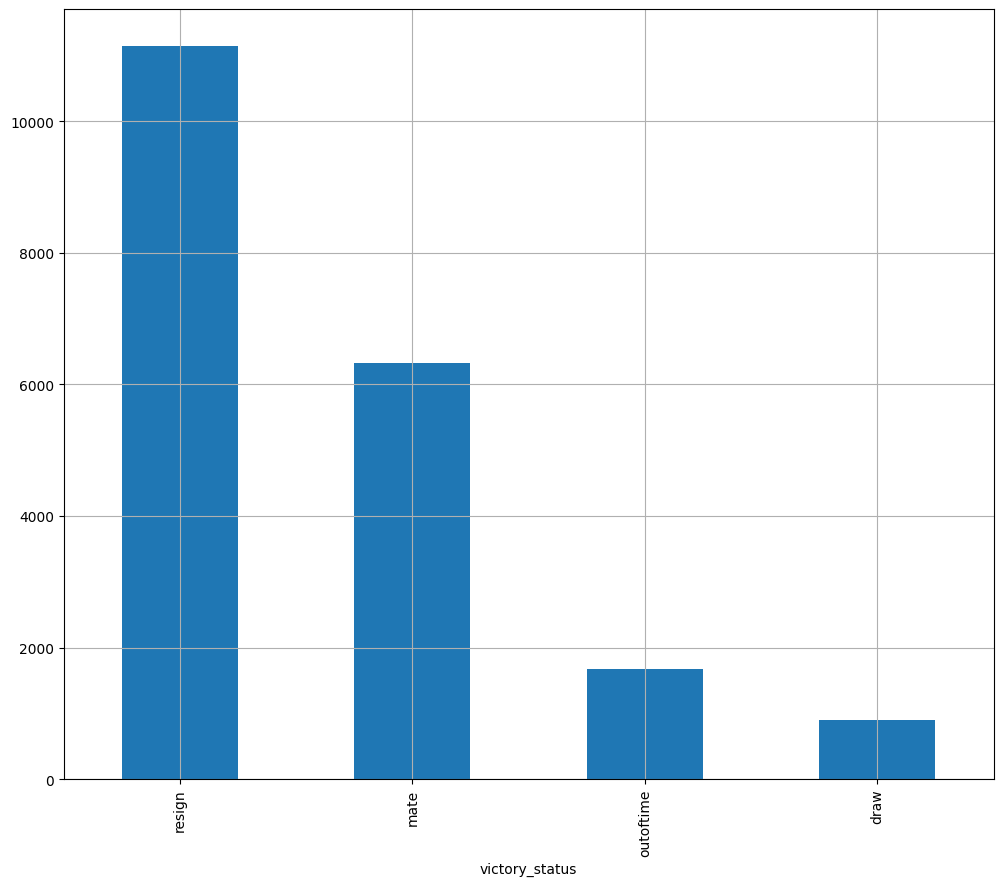

In [12]:
#distribution of victory staus
victory = data['victory_status'].value_counts()
victory.plot(kind='bar', figsize=(12, 10))
plt.grid(True)

From the plot above, we can see that majority of the players resigned. The number of games resigned is ridiculosly high and only very few games were draw.

In [13]:
victory

victory_status
resign       11147
mate          6325
outoftime     1680
draw           906
Name: count, dtype: int64

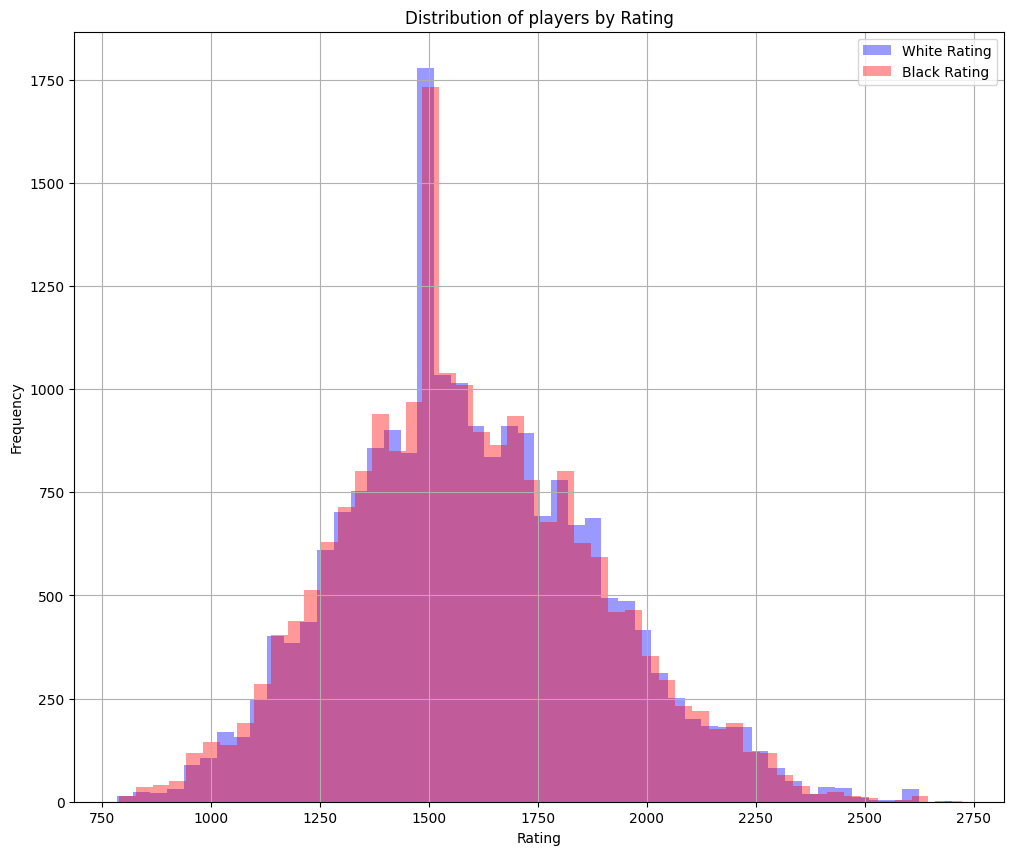

In [14]:
#distribution of players by ratings
plt.figure(figsize=(12, 10))
plt.hist(data['white_rating'], bins=50, color='blue', alpha=0.4, label='White Rating')
plt.hist(data['black_rating'], bins=50, color='Red', alpha=0.4, label='Black Rating')
plt.xlabel('Rating')
plt.ylabel("Frequency")
plt.title('Distribution of players by Rating')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [15]:
#clean the opening column
import re

def clean_opening(opening):
    #split based on #, | and : and pick the first part only
    opening = opening.split('#')[0]
    opening = opening.split('|')[0]
    opening = opening.split(':')[0]
    #sustitute words like Accepted or Decilined or digits with empty strings
    opening = re.sub(r'Accepted|Declined|\d+', '', opening)
    #strip of trailing white speaces
    return opening.strip()

data['opening_name'] = data['opening_name'].apply(clean_opening)

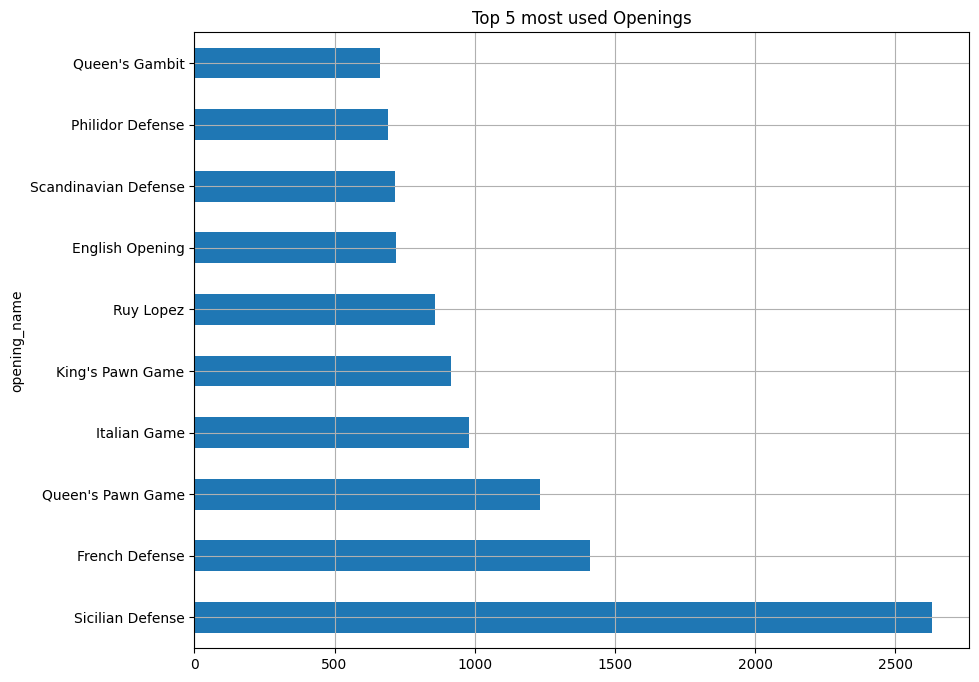

In [16]:
#most common openings
top_10 = data['opening_name'].value_counts().nlargest(10)
top_10.plot(kind='barh', figsize=(10,8))
plt.title("Top 5 most used Openings")
plt.grid(True)

From the visualization above we can conclude that Sicilian Defence is the most common in this data set

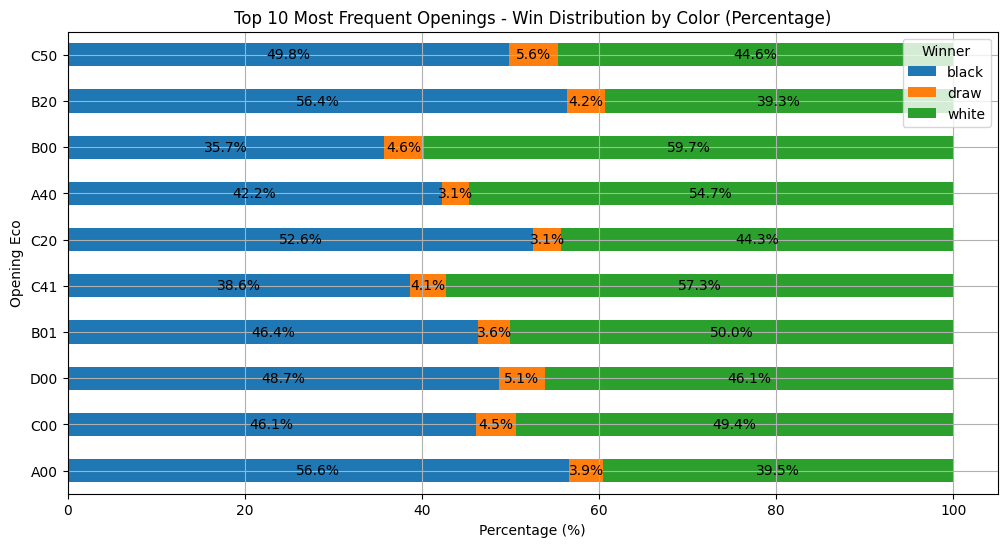

In [17]:
openings_by_color = data.groupby(['opening_eco', 'winner']).size().unstack(fill_value=0)


top_openings_by_color = openings_by_color.loc[openings_by_color.sum(axis=1).nlargest(10).index]

# Calculate percentage for each winner category within each opening
top_openings_by_color_percentage = top_openings_by_color.div(top_openings_by_color.sum(axis=1), axis=0) * 100


ax = top_openings_by_color_percentage.plot(kind='barh', stacked=True, figsize=(12, 6))


for i in range(len(top_openings_by_color_percentage)):
    cumulative_sum = 0  # This will keep track of the cumulative sum for each bar
    for j, winner in enumerate(top_openings_by_color_percentage.columns):
        width = top_openings_by_color_percentage.iloc[i, j]  # The percentage value for this segment
        if width > 0:  # Only annotate non-zero values
            ax.annotate(f'{width:.1f}%', 
                        xy=(cumulative_sum + width / 2, i),  # Position at the middle of the segment
                        ha='center', va='center')
            cumulative_sum += width  

plt.title('Top 10 Most Frequent Openings - Win Distribution by Color (Percentage)')
plt.xlabel('Percentage (%)')
plt.ylabel('Opening Eco')
plt.grid(True)
plt.legend(title='Winner')
plt.show()

B00 has the most white wins, A00 has the most black wins C50 has the most draws

C:\Users\HP\AppData\Local\Temp\ipykernel_15224\3479881908.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_turns_victory_status.values, y=avg_turns_victory_status.index, palette="viridis")


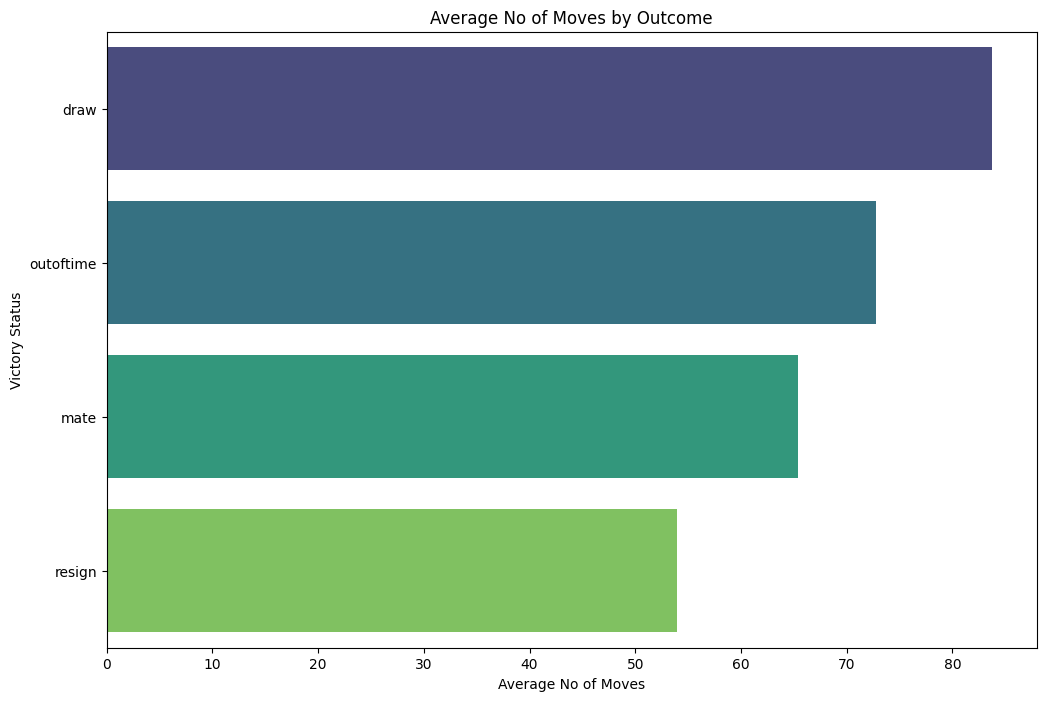

In [18]:
#average turns vs victory status
avg_turns_victory_status = data.groupby(['victory_status'])['turns'].mean().sort_values(ascending=False)

# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_turns_victory_status.values, y=avg_turns_victory_status.index, palette="viridis")
plt.title("Average No of Moves by Outcome")
plt.xlabel("Average No of Moves")
plt.ylabel("Victory Status")
plt.show()

Games that end in draw are most likely to have very large number of moves. <br>
this visualization shows that games that end in resign and mate often have fewer no of moves and are often predictable while games that end in draw have longer number of moves and often end in a deadlock.
Most games, except those that end in resign often have at least 50 moves before then end of the game.

In [19]:
avg_turns_victory_status.values

array([83.78145695, 72.74285714, 65.41501976, 53.91253252])

In [ ]:
#opeinn preferred by top players
#set the threshold for top-rated players
rating_threshold = 2000

#filter for rating threshold
top_rated_players = data[(data['white_rating'] > ragiting_threshold) | (data['black_rating'] > rating_threshold)]

#count the number of time each opening was used
top_openings = top_rated_players['opening_name'].value_counts()

top_openings.head(10)

opening_name
Sicilian Defense        491
French Defense          197
Queen's Pawn Game       152
Ruy Lopez               149
English Opening         123
Caro-Kann Defense       112
Italian Game            107
Queen's Gambit          106
Scandinavian Defense     89
Indian Game              65
Name: count, dtype: int64

In [21]:
top_opening_eco = top_rated_players['opening_eco'].value_counts()
top_opening_eco.head(10)

opening_eco
B01    89
C00    79
D02    76
A00    68
D00    64
A40    61
B00    57
A45    53
B20    52
C45    44
Name: count, dtype: int64

The most used opening ecos are B01, C00, D02, A00 and D00

C:\Users\HP\AppData\Local\Temp\ipykernel_15224\1620923472.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_openings.head(10).values, y=top_openings.head(10).index, palette='coolwarm')


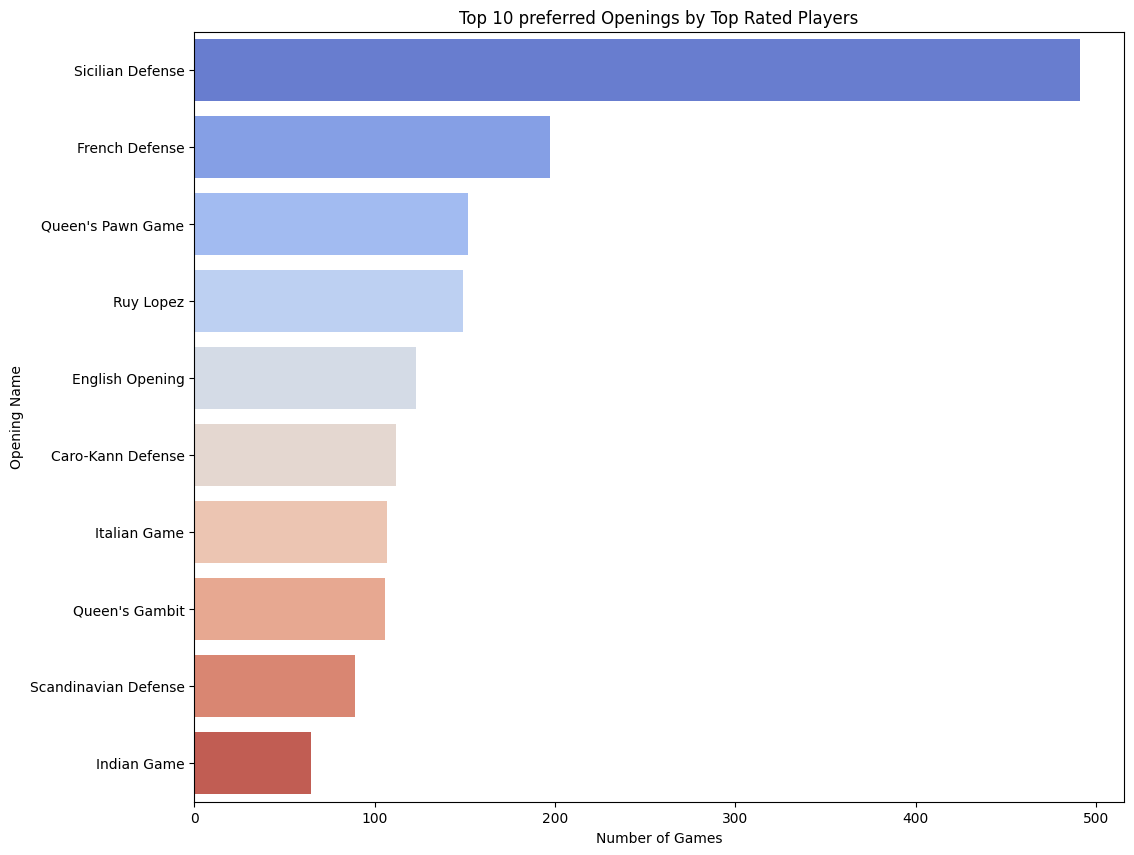

In [22]:
#visualize the opening preferred byt top players

plt.figure(figsize=(12, 10))
sns.barplot(x=top_openings.head(10).values, y=top_openings.head(10).index, palette='coolwarm')
plt.title('Top 10 preferred Openings by Top Rated Players')
plt.xlabel('Number of Games')
plt.ylabel('Opening Name')
plt.show()

Sicilian Defence is the most preferred opening by top rated players

C:\Users\HP\AppData\Local\Temp\ipykernel_15224\1913933989.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_opening_eco.head(10).values, y=top_opening_eco.head(10).index, palette='coolwarm')


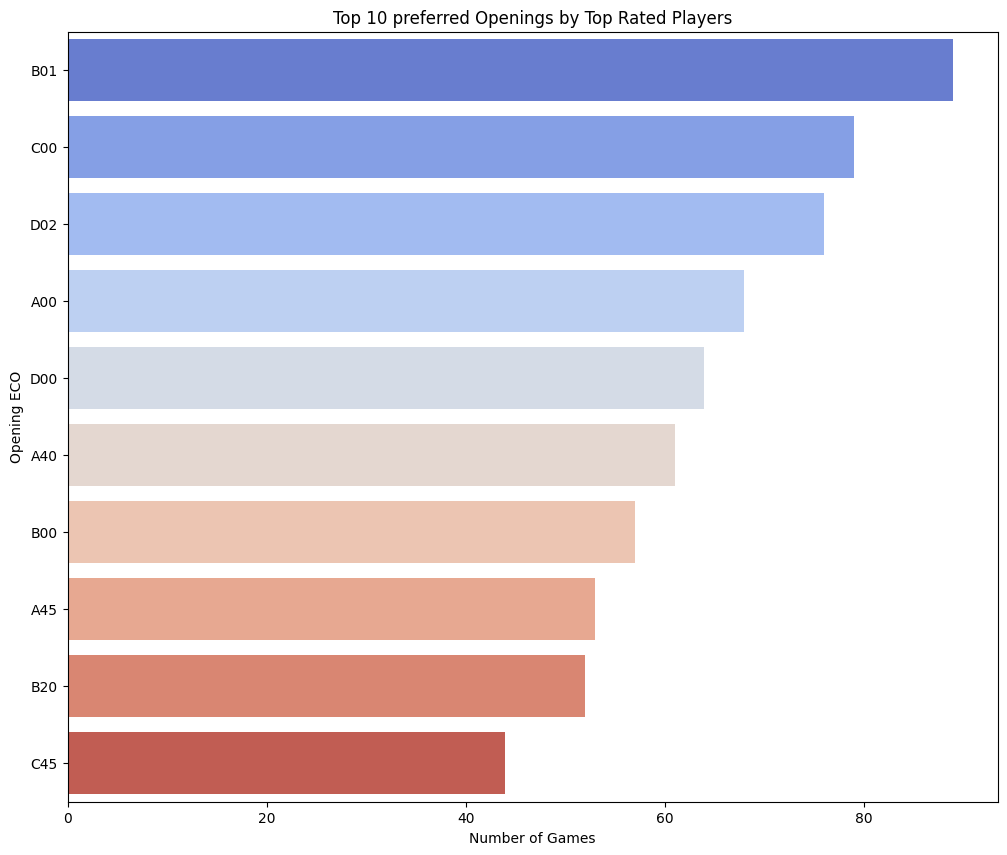

In [23]:
#visualize the opening preferred byt top players

plt.figure(figsize=(12, 10))
sns.barplot(x=top_opening_eco.head(10).values, y=top_opening_eco.head(10).index, palette='coolwarm')
plt.title('Top 10 preferred Openings by Top Rated Players')
plt.xlabel('Number of Games')
plt.ylabel('Opening ECO')
plt.show()

Sicilian Defence is the most preferred opening by top rated players

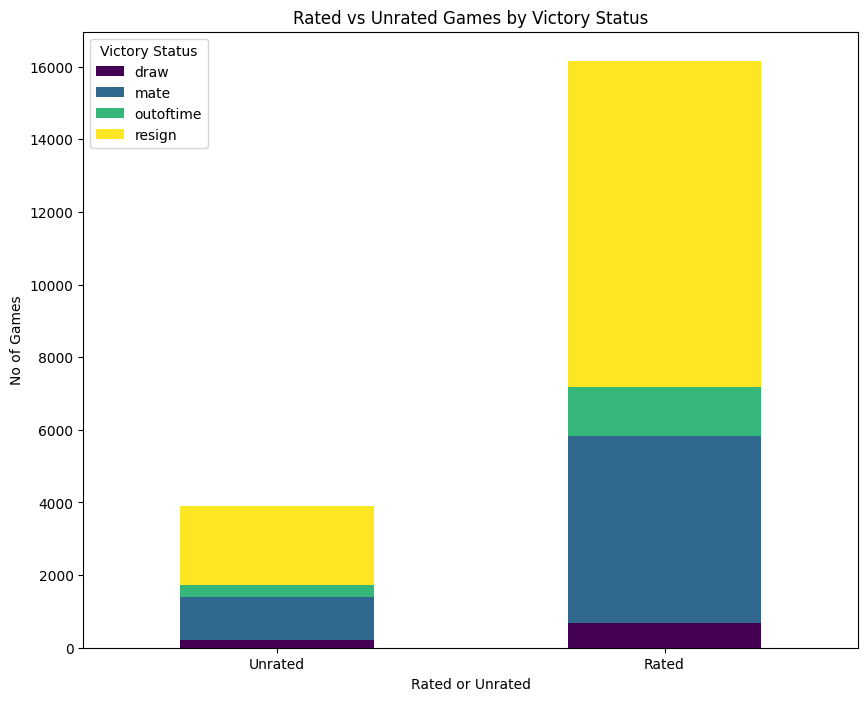

In [24]:
#rated games vs victory status
#group the data

rated_vs_victory = data.groupby(['rated', 'victory_status']).size().unstack(fill_value=0)
rated_vs_victory.plot(kind='bar', stacked=True, figsize=(10, 8), colormap='viridis')
plt.title('Rated vs Unrated Games by Victory Status')
plt.xlabel('Rated or Unrated')
plt.ylabel('No of Games')
plt.xticks(ticks=[0,1], labels=['Unrated', 'Rated'], rotation=0)
plt.legend(title='Victory Status', loc='upper left')
plt.show()

In [25]:
rated_vs_victory

victory_status,draw,mate,outoftime,resign
rated,,,,
False,225,1179,321,2178
True,681,5146,1359,8969


Text(0.5, 1.0, 'Rating Difference (White - Black) vs Winner')

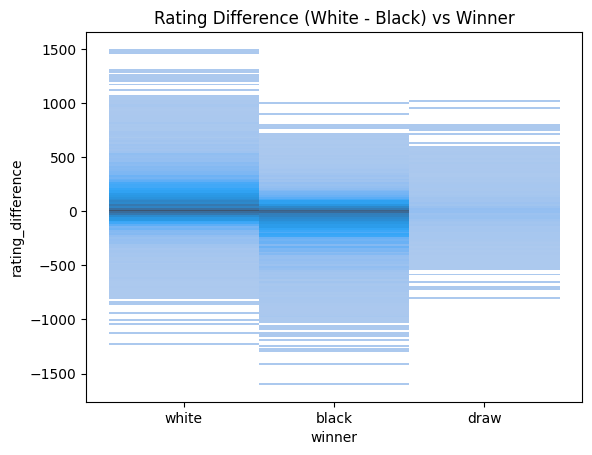

In [26]:
#rating difference between white and black
import numpy as np
data['rating_difference'] = data['white_rating'] - data['black_rating']

sns.histplot(data=data, x='winner', y='rating_difference')
plt.title("Rating Difference (White - Black) vs Winner")

This shows that white typically wins when the its rating is higher, same goes for black wins and draw occurs when white and black rating have similar or close rating

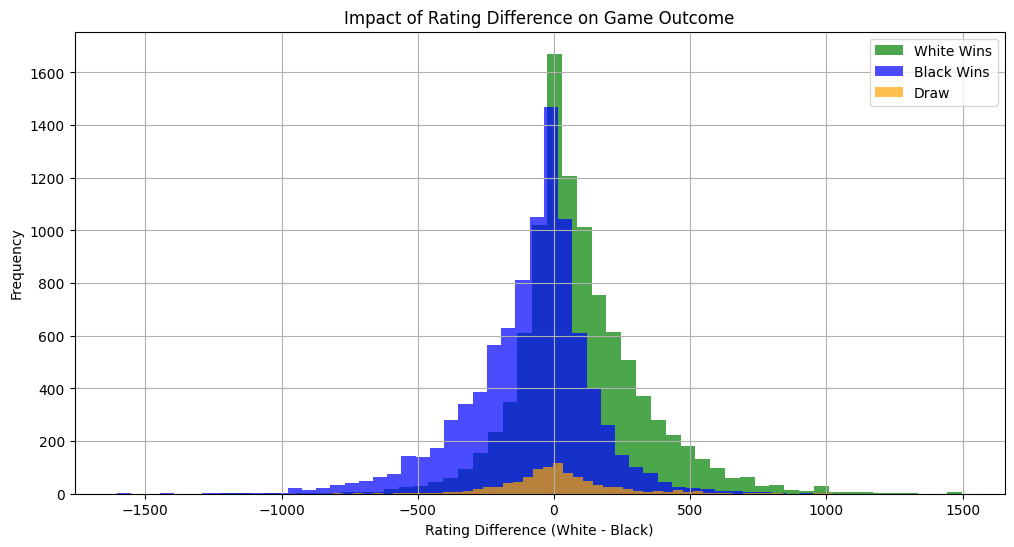

In [27]:
# Plot rating difference based on winner
plt.figure(figsize=(12, 6))
data[data['winner'] == 'white']['rating_difference'].plot(kind='hist', bins=50, alpha=0.7, label='White Wins', color='green')
data[data['winner'] == 'black']['rating_difference'].plot(kind='hist', bins=50, alpha=0.7, label='Black Wins', color='blue')
data[data['winner'] == 'draw']['rating_difference'].plot(kind='hist', bins=50, alpha=0.7, label='Draw', color='orange')
plt.xlabel('Rating Difference (White - Black)')
plt.ylabel('Frequency')
plt.title('Impact of Rating Difference on Game Outcome')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


this typically shows that more often than not, the player with the more rating wins the game and in cases where the rating of both players are the same, the white player often wins with the opening advantage.

In [28]:
#correlation between rating and win_rate
data['white_wins'] = data['winner'].apply(lambda x: 1 if x == 'white' else (-1 if x =='black' else 0))

corr_white = data[['white_rating', 'white_wins']].corr().iloc[0,1]
corr_black = data[['black_rating', 'white_wins']].corr().iloc[0,1]

print(f"White corr: {corr_white}, Black corr: {corr_black}")

White corr: 0.14170011586340436, Black corr: -0.16681533252120684


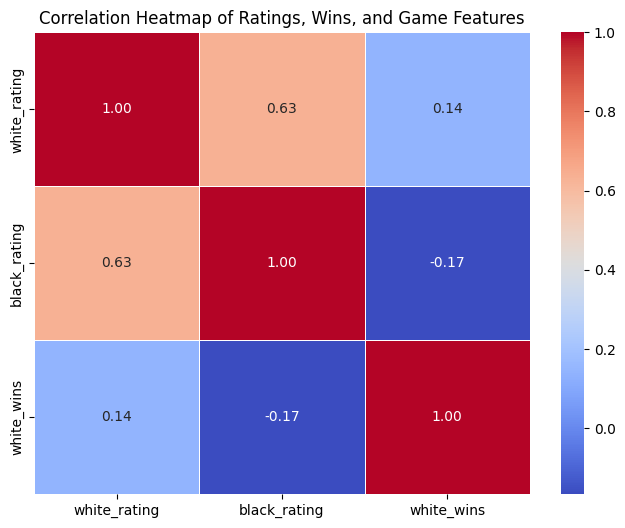

In [29]:
relevant_columns = data[['white_rating', 'black_rating', 'white_wins']]

# Calculate the correlation matrix
correlation_matrix = relevant_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Ratings, Wins, and Game Features')
plt.show()

Positive correlation between black_rating and white_rating shows that in a game it is highly likely for similarly rated players to paly against each other. <br>
the correlation between white wins and white rating suggests that highly rated white players tend to win slightly more often. <br>

<h3>Feature Engineering<h3>

In [30]:
#split the time increment column into two columns
data[['game_time', 'time_increment_per_move']] = data['time_increment'].str.split('+', expand=True)

#change the type pf time increment per move and game time
data['time_increment_per_move'] = data['time_increment_per_move'].astype(int)
data['game_time'] = data['game_time'].astype(int)

#get the estimated game duration based on the game time and the time increment
data['estimated_game_duration'] = (data['game_time'] * 60)  + (data['time_increment_per_move'] * data['turns'])

#check the first two rows of the data
data.head(2)

,rated,start_time,end_time,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,...,moves,opening_eco,opening_name,opening_ply,game_duration,rating_difference,white_wins,game_time,time_increment_per_move,estimated_game_duration
game_id,,,,,,,,,,,,,,,,,,,,,
TZJHLljE,False,1504210000000,1504210000000,13,outoftime,white,15+2,bourgris,1500,a-00,...,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense,5,0,309,1,15,2,926
l1NXvwaE,True,1504130000000,1504130000000,16,resign,black,5+10,a-00,1322,skinnerua,...,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense,4,0,61,-1,5,10,460


In [31]:
#classify time control into game type
def classify_time_control(row):
    if row['game_time'] <= 2 and row['time_increment_per_move'] <= 1:
        return 'bullet'
    elif row['game_time'] <= 10 and row['time_increment_per_move'] <= 5:
        return 'blitz'
    elif row['game_time'] <= 15 and row['time_increment_per_move'] <= 10:
        return 'rapid'
    else:
        return 'classical'
    
data['time_control_type'] = data.apply(classify_time_control, axis=1)
data.head(2)

,rated,start_time,end_time,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,...,opening_eco,opening_name,opening_ply,game_duration,rating_difference,white_wins,game_time,time_increment_per_move,estimated_game_duration,time_control_type
game_id,,,,,,,,,,,,,,,,,,,,,
TZJHLljE,False,1504210000000,1504210000000,13,outoftime,white,15+2,bourgris,1500,a-00,...,D10,Slav Defense,5,0,309,1,15,2,926,rapid
l1NXvwaE,True,1504130000000,1504130000000,16,resign,black,5+10,a-00,1322,skinnerua,...,B00,Nimzowitsch Defense,4,0,61,-1,5,10,460,rapid


Text(0.5, 1.0, 'Distribution of Game types by Time Control')

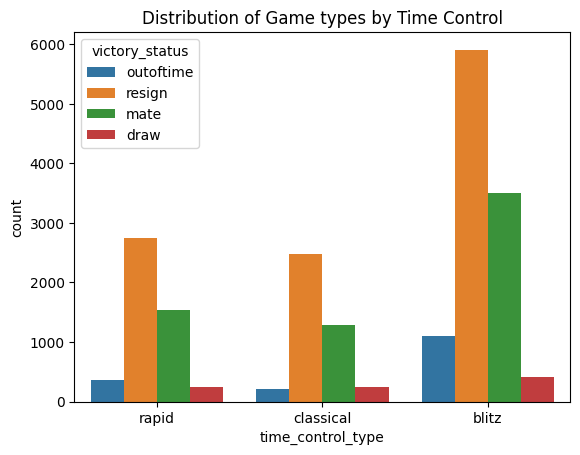

In [32]:
#distribution of time control type
sns.countplot(data, x='time_control_type', hue='victory_status')
plt.title("Distribution of Game types by Time Control")

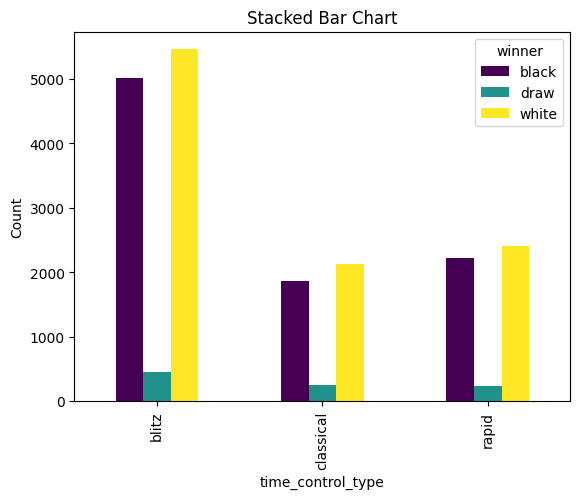

In [33]:
#victory outcome by time control
crosstab = pd.crosstab(data['time_control_type'], data['winner'])

# Stacked bar plot
crosstab.plot(kind='bar', stacked=False, colormap='viridis')
plt.title('Stacked Bar Chart')
plt.ylabel('Count')
plt.show()

For Blitz game, white wins are more common here than black wins, this is the same across all time control types.


Text(0.5, 1.05, 'Estimated Game Duration by Number of Moves for Each Time Control')

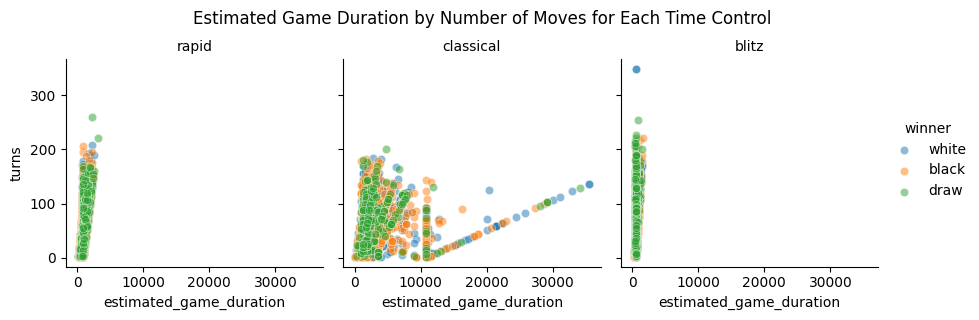

In [34]:
#number of moves vs total time
g = sns.FacetGrid(data, col="time_control_type", sharex=True, sharey=True, hue='winner')
g.map(sns.scatterplot, "estimated_game_duration", "turns", alpha=0.5)
g.set_titles("{col_name}")
g.add_legend()
plt.suptitle("Estimated Game Duration by Number of Moves for Each Time Control", y=1.05)

As the number of turns increases the game duration also increases.

In [35]:
redundant_cols = ['start_time', 'end_time', 'time_increment', 'opening_name', 'white_wins', 'black_id', 'white_id']
data.drop(columns=redundant_cols, axis=1, inplace=True)
data.columns

Index(['rated', 'turns', 'victory_status', 'winner', 'white_rating',
       'black_rating', 'moves', 'opening_eco', 'opening_ply', 'game_duration',
       'rating_difference', 'game_time', 'time_increment_per_move',
       'estimated_game_duration', 'time_control_type'],
      dtype='object')

In [36]:
data['rated'] = data['rated'].apply(lambda x: 1 if x == 'True' else 0)

Natural Language Processing(NLP)

In [37]:
#n_grams hashing to capture move patterns
from sklearn.feature_extraction.text import HashingVectorizer

hasher = HashingVectorizer(n_features=1, ngram_range=(2,2)) #n_features = 1 for a single hash score.
data['moves_hashed'] = hasher.fit_transform(data['moves']).toarray().flatten()
data['moves_hashed']

game_id
TZJHLljE    0.0
l1NXvwaE    1.0
mIICvQHh    1.0
kWKvrqYL   -1.0
9tXo1AUZ    1.0
           ... 
EfqH7VVH    0.0
WSJDhbPl    0.0
yrAas0Kj    1.0
b0v4tRyF   -1.0
N8G2JHGG   -1.0
Name: moves_hashed, Length: 20058, dtype: float64

Pros and Cons <br>
Pros:<br>
Captures sequences of moves without high dimensionality.<br>
Works with very large datasets due to fixed-length output.<br>
Cons:<br>
Hashing may cause some collisions (different sequences mapping to the same hash).<br>
Doesn't retain the exact moves; only a hashed representation.<br>

In [38]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [39]:
data.shape

(19629, 16)

Train Test Split

In [40]:
from sklearn.model_selection import train_test_split
y = data['winner']
X = data.drop(columns=['winner', 'moves'], axis=1)

In [41]:
y.value_counts()

winner
white    9792
black    8919
draw      918
Name: count, dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, shuffle=True, stratify=y)

In [43]:
#separate the numeric and the object cols
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
cat_cols.pop(1)

'opening_eco'

In [44]:
#encoding the data
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
le = LabelEncoder()

In [45]:
#encoding the target data
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
y_train_encoded

array([2, 0, 0, ..., 2, 2, 2])

In [46]:
def encode_features(X_train, X_test, y_train_encoded, cat_cols, mean_target_col, target_col_name="winner_encoded"):
    """
    Perform mean target encoding for a specific column and one-hot encoding for other categorical columns.

    Parameters:
    - X_train (pd.DataFrame): Training data containing categorical columns.
    - X_test (pd.DataFrame): Testing data containing categorical columns.
    - y_train_encoded (pd.Series): Encoded target variable for training data.
    - cat_cols (list): List of categorical columns to encode.
    - mean_target_col (str): Name of the column for mean target encoding.
    - target_col_name (str): Temporary column name for the encoded target in X_train (default: 'encoded_target').

    Returns:
    - X_train_encoded (pd.DataFrame): Training data with only encoded categorical features.
    - X_test_encoded (pd.DataFrame): Testing data with only encoded categorical features.
    """
    # Step 1: Mean Target Encoding for the specified column
    X_train[target_col_name] = y_train_encoded

    # Compute mean target encoding for the specific column
    mean_encoding = X_train.groupby(mean_target_col)[target_col_name].mean()

    # Remove the temporary target column
    X_train.drop(columns=[target_col_name], inplace=True)

    # Apply mean target encoding to X_train and X_test
    X_train[f"{mean_target_col}_encoded"] = X_train[mean_target_col].map(mean_encoding)
    X_test[f"{mean_target_col}_encoded"] = X_test[mean_target_col].map(mean_encoding)

    # Handle unseen/unknown categories in X_test
    global_mean = y_train_encoded.mean()
    X_test[f"{mean_target_col}_encoded"].fillna(global_mean, inplace=True)



    X_train_encoded = pd.get_dummies(X_train[cat_cols], drop_first=True, dtype=int)
    X_test_encoded = pd.get_dummies(X_test[cat_cols], drop_first=True, dtype=int)

    # Align columns in case of mismatches between train and test
    #X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join="outer", axis=1, fill_value=0)

    # Combine the one-hot-encoded columns with the mean-encoded column
    X_train_final = pd.concat([X_train_encoded, X_train[f"{mean_target_col}_encoded"]], axis=1)
    X_test_final = pd.concat([X_test_encoded, X_test[f"{mean_target_col}_encoded"]], axis=1)

    return X_train_final, X_test_final


In [47]:
X_train_encoded, X_test_encoded = encode_features(
    X_train=X_train,
    X_test=X_test,
    y_train_encoded=y_train_encoded,
    cat_cols=cat_cols,
    mean_target_col='opening_eco'
)

In [48]:
#join the cat cols to the num cols
num_cols = X_train.select_dtypes(include=['number']).columns.tolist()
num_cols.pop()

'opening_eco_encoded'

In [49]:
X_train_joined = pd.merge(X_train[num_cols],X_train_encoded, on='game_id')
X_test_joined = pd.merge(X_test[num_cols], X_test_encoded, on='game_id')

In [50]:
X_train_joined.drop_duplicates(inplace=True)
X_test_joined.drop_duplicates(inplace=True)

In [51]:
X_train_joined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13740 entries, Y2p579TY to 35D5P5AS
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rated                        13740 non-null  int64  
 1   turns                        13740 non-null  int64  
 2   white_rating                 13740 non-null  int64  
 3   black_rating                 13740 non-null  int64  
 4   opening_ply                  13740 non-null  int64  
 5   game_duration                13740 non-null  int64  
 6   rating_difference            13740 non-null  int64  
 7   game_time                    13740 non-null  int32  
 8   time_increment_per_move      13740 non-null  int32  
 9   estimated_game_duration      13740 non-null  int64  
 10  moves_hashed                 13740 non-null  float64
 11  victory_status_mate          13740 non-null  int32  
 12  victory_status_outoftime     13740 non-null  int32  
 13  victory_sta

In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE( random_state=42)
X_res, y_res = smote.fit_resample(X_train_joined, y_train_encoded)

In [53]:
#count the num of unique values in y_res
import numpy as np
y_i, count = np.unique(y_res, return_counts=True)
print(np.asarray((y_i, count)).T)

[[   0 6854]
 [   1 6854]
 [   2 6854]]


In [54]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

In [55]:
#preprocessing for numerical data
scaler = StandardScaler()

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", scaler, num_cols),  # Scale numerical features
    ]
)

In [57]:
#define a range of paramter for C (Alpha equivalent)
param_grid = {
    "feature_selection__estimator__C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], #for the lasso reg
    "classification__C": [0.0001,0.001, 0.01, 0.1, 1, 10, 100], #for the final log reg
}

#number of folds 
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the pipeline
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),  # Preprocessing step
    ("feature_selection", SelectFromModel(LogisticRegression(
        penalty="l1", solver="saga", max_iter=1000, random_state=42))),  # Lasso for feature selection
    ("classification", LogisticRegression(
        penalty="l1", 
        solver="saga", 
        multi_class="multinomial", 
        max_iter=1000, 
        random_state=42))  # Logistic Regression for classification
])


In [58]:
# Perform Grid Search
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="accuracy",  # Use an appropriate scoring metric
    cv=kf,                # Number of cross-validation folds
    n_jobs=-1 ,           # Use all available cores
    error_score='raise'
)

# Fit the grid search on your training data
grid_search.fit(X_train_joined, y_train_encoded)

# Best parameters and performance
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Score:", grid_search.best_score_)

ValueError: Found array with 0 feature(s) (shape=(10992, 0)) while a minimum of 1 is required by LogisticRegression.

In [ ]:
#get the best parameters
best_params = grid_search.best_params_

#set the best paramters for the pipeline
pipeline.set_params(**best_params)

# Fit the model
pipeline.fit(X_train_joined, y_train_encoded)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['rated', 'turns',
                                                   'white_rating',
                                                   'black_rating',
                                                   'opening_ply',
                                                   'game_duration',
                                                   'rating_difference',
                                                   'game_time',
                                                   'time_increment_per_move',
                                                   'estimated_game_duration',
                                                   'moves_hashed'])])),
                ('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(C=0.1,
                                                              max_iter=1000,
                                                              penalty='l1',
                                                              random_state=42,
                                                              solver='saga'))),
                ('classification',
                 LogisticRegression(C=0.1, max_iter=1000,
                                    multi_class='multinomial', penalty='l1',
                                    random_state=42, solver='saga'))])

In [ ]:
# Predict and evaluate
y_pred = pipeline.predict(X_test_joined)
mse = mean_squared_error(y_test_encoded, y_pred)
r2 = r2_score(y_test_encoded, y_pred)
report = classification_report(y_test_encoded, y_pred)

print(f"MSE: {mse}")
print(f"R Squared: {r2}")
print(f"Classification Report: \n{report}")

MSE: 1.86856851757514
R Squared: -0.9641779593856754
Classification Report: 
              precision    recall  f1-score   support

           0       0.38      0.01      0.01      2676
           1       0.00      0.00      0.00       275
           2       0.50      0.99      0.66      2938

    accuracy                           0.50      5889
   macro avg       0.29      0.33      0.22      5889
weighted avg       0.42      0.50      0.34      5889



In [ ]:
# Feature importance
selected_model = pipeline.named_steps["feature_selection"].estimator_
feature_names = X_train_joined.columns.tolist()
coefficients = np.sum(np.abs(selected_model.coef_), axis=0)
important_feature_indices = np.where(coefficients != 0)[0]
important_features = [feature_names[i] for i in important_feature_indices]
print(f"Important Features: {important_features}")

Important Features: ['white_rating', 'black_rating', 'opening_ply', 'game_duration', 'rating_difference', 'game_time', 'time_increment_per_move', 'estimated_game_duration', 'moves_hashed']


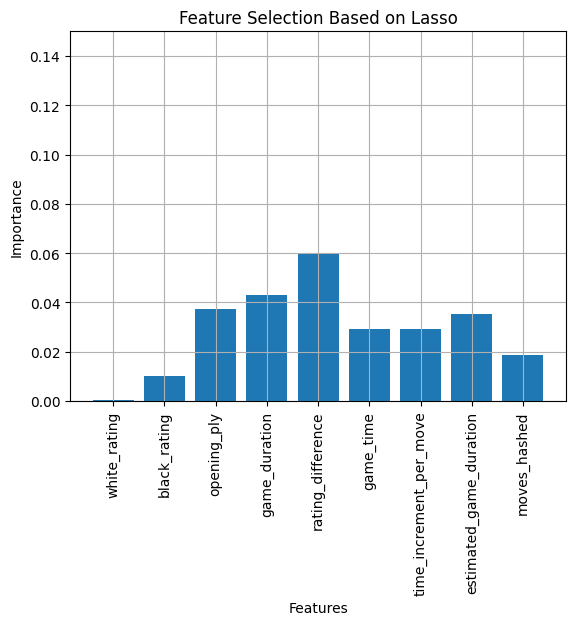

In [ ]:
#visualizing the important feature
plt.bar(important_features, coefficients[important_feature_indices])
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.15)
plt.show()

In [ ]:
# Extract selected features for training and testing
X_train_selected = X_train_joined[important_features]
X_test_selected = X_test_joined[important_features]

In [ ]:
#retraining the lasso model on th ebest parameter and the important features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), important_features)  # Apply scaling to selected features
    ]
)
# Create the pipeline with Lasso Logistic Regression using the best parameters
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),  # Assume `preprocessor` is already defined
    ("classification", LogisticRegression(
        penalty="l1", 
        solver="saga", 
        C=best_params.get("classification__C", 1.0),  # Use best C from GridSearch
        multi_class="multinomial", 
        max_iter=1000
    ))
])

# Retrain the pipeline with the selected important features
pipeline.fit(X_train_selected, y_train_encoded)

# Make predictions on the test data
y_pred = pipeline.predict(X_test_selected)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test_encoded, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.01      0.01      2676
           1       0.00      0.00      0.00       275
           2       0.50      0.99      0.66      2938

    accuracy                           0.50      5889
   macro avg       0.29      0.33      0.22      5889
weighted avg       0.42      0.50      0.34      5889



In [ ]:
# Optional: Save the model
import joblib
joblib.dump(pipeline, "lasso_logistic_pipeline.pkl")